In [1]:
import time

time.ctime()

'Thu Sep 14 00:24:53 2023'

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il

import itertools as it
import random
import warnings

from scipy import optimize

# needed?
from skimage.transform import hough_line, hough_line_peaks, rotate
from skimage.feature import canny
from skimage.io import imread

from ipydex import Container

%load_ext ipydex.displaytools
%matplotlib inline

In [3]:
import stage_2a_bar_selection as bs
il.reload(bs)

from stage_2a_bar_selection import (
    load_img,
    rgb,
    get_bbox_list,
    assign_row_col,
    index_combinations,
    find_missing_boxes,
    handle_missing_boxes,
    select_bar_from_file,
    Attr_Array,
    rotate_img,
    CavityCarrierImageAnalyzier,

)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [4]:
# img_dir = "/home/ck/iee-ge/XAI-DIA/image_classification/stage2/single_bars/raw2/
img_dir = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0"
img_fpath = f"{img_dir}/2023-06-26_06-17-52_C50.jpg"

# relevant for angle debugging: a4

In [5]:
ccia = CavityCarrierImageAnalyzier(img_fpath)

(bs.get_border_columns(cell)) := (1, 23)

---

(bs.get_border_columns(cell.T)) := (0, 102)

---

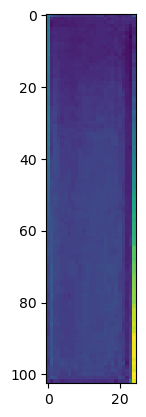

In [6]:
cell = ccia.get_raw_cell("a", "4", 0, 0)
bs.get_border_columns(cell) ##:
bs.get_border_columns(cell.T) ##:
plt.imshow(cell)

In [7]:
il.reload(bs)
ccia = bs.CavityCarrierImageAnalyzier(img_fpath)

CPU times: user 214 ms, sys: 7.15 ms, total: 221 ms
Wall time: 220 ms


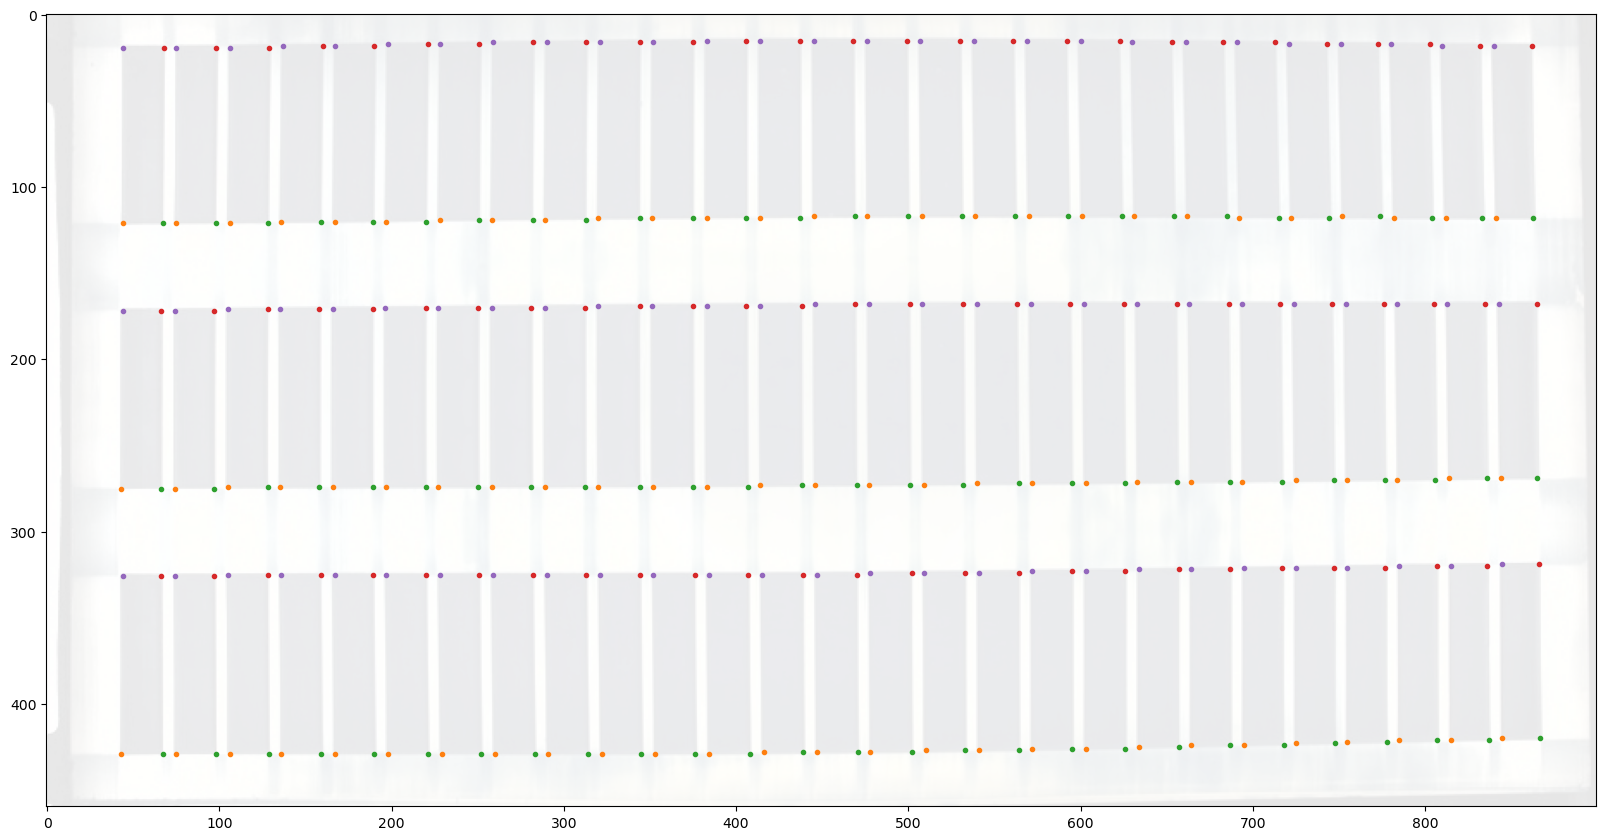

In [8]:
%%time
plot = True

if plot:
        plt.figure(figsize=(20, 20))

cell_tups = bs.cell_tups
corners_dict = {}
for row, col in cell_tups:
    dc = Container()

    corner_res = ccia.find_cell_corners(row, col, plot=plot, dc=dc)
    corners_dict[(row, col)] = corner_res

if plot:
    plt.imshow(dc.self.img, alpha=0.1)

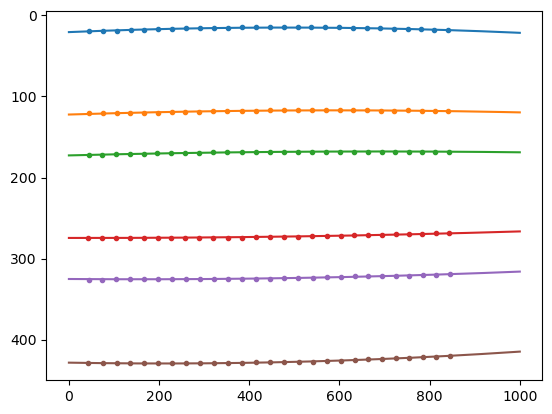

In [9]:
import types

def fill_corners_dict(self, plot=None, dc=None):
    self.corners_dict = {}
    for row, col in cell_tups:

        corner_res = self.find_cell_corners(row, col, plot=plot, dc=dc)
        key = (row, str(col))
        self.corners_dict[key] = corner_res
        
    return self.corners_dict


ccia.fill_corners_dict = types.MethodType(fill_corners_dict, ccia)

def get_horizontal_line(self, hr_row, corner_name="upper_left", plot=False):
    self.fill_corners_dict()
    assert hr_row in "abc"
    
    res = Container()
    points = []
    
    for row, col in cell_tups:
        if row != hr_row:
            continue
        
        corner_container = self.corners_dict[(row, col)]
        points.append(getattr(corner_container, corner_name))
        
    res.points = np.array(points)
    res.coeffs = np.polyfit(*res.points.T, 2)
    res.poly = np.poly1d(res.coeffs)
    
    if plot:
        xx = np.linspace(0, 1000, 500)
        line, = plt.plot(*res.points.T, ".")
        plt.plot(xx, res.poly(xx), color=line.get_color())
        
    
    return res

line_a1 = get_horizontal_line(ccia, "a", plot=True)
line_a2 = get_horizontal_line(ccia, "a", corner_name="lower_left", plot=True)

line_b1 = get_horizontal_line(ccia, "b", plot=True)
line_b2 = get_horizontal_line(ccia, "b", corner_name="lower_left", plot=True)

line_c1 = get_horizontal_line(ccia, "c", plot=True)
line_c2 = get_horizontal_line(ccia, "c", corner_name="lower_left", plot=True)

plt.gca().invert_yaxis()


In [10]:
%%time

ccia.find_cell_corners("a", "4")

CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 1.08 ms


In [11]:
dc.bb_delta_row //3

34